In [261]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
#%load_ext google.colab.data_table #extension permettant d'examiner plus facilement les dataset grace à l'ajout d'une case "Filter"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [262]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import seaborn as sns
%pip install dataprep #librairie permettant de faire l'analyse exploratoire des donnés
from dataprep.datasets import load_dataset
from dataprep.eda import create_report

  Using cached pydantic-1.10.13-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (3.1 MB)
  Attempting uninstall: pydantic
    Found existing installation: pydantic 2.5.2
    Uninstalling pydantic-2.5.2:
      Successfully uninstalled pydantic-2.5.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
llmx 0.0.15a0 requires cohere, which is not installed.
llmx 0.0.15a0 requires openai, which is not installed.
llmx 0.0.15a0 requires tiktoken, which is not installed.
ydata-profiling 4.6.2 requires pydantic>=2, but you have pydantic 1.10.13 which is incompatible.


In [263]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Projet 9/volaille2017.csv', index_col=0)
# index_col=0 supprime l'apparition de la colonne unnamed_0 du a un problème de header

In [264]:
df.head()


,Zone,Quantite_exporte_de_france,Stabilite_politique,PIB_par_hab_2017_euro,Evo_PIB_5ans,Dispo_alim(Kg/Pers/an),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture_total,Production,Distance_france,Droit de douane,tva,taux_impot_sur_vente,Doing_business_index
0,Afghanistan,0.0,-2.80,498.34,-20.054736,1.53,5.700000e+07,0.0,29000000.0,5.500000e+07,2.800000e+07,5590.3810,7.02,0.0,10.0,44.06
1,Afrique du Sud,0.0,-0.28,6330.41,-17.609702,35.69,2.118000e+09,63000000.0,514000000.0,2.035000e+09,1.667000e+09,9353.5520,4.51,15.0,15.0,67.02
2,Albanie,440.0,0.38,4259.17,6.671974,16.36,4.700000e+07,0.0,38000000.0,4.700000e+07,1.300000e+07,1603.5340,0.85,20.0,20.0,67.75
3,Algérie,51470.0,-0.92,3886.84,-26.303107,6.38,2.770000e+08,0.0,2000000.0,2.640000e+08,2.750000e+08,1340.3900,8.85,19.0,19.0,48.60
4,Allemagne,1313490.0,0.59,41973.43,1.816712,19.47,1.739000e+09,646000000.0,842000000.0,1.609000e+09,1.514000e+09,439.8984,1.79,19.0,19.0,79.71


Description du dataset :
* Zone : pays
* Quantite_exporte_de_france :
* Stabilité politique :
* PIB_par_hab_2017_euro :
* Evo_PIB_5ans :
* Dispo_alim(kg/Pers/an) :
* Disponibilité intérieur :
* Exportation - quantité :
* Importations - quantité :
* Nourriture_total :
* Production :
* Distance_france :
* Droit de douane :
* tva :
* Taux_impot_sur_vente :
* Doing_business_index :

In [265]:
#renommage de la colonne tonnage exporte pour quelle soit plus explicite
df.rename(columns={'tonnage exporte':'tonnage exporte de France'}, inplace = True)

In [266]:
df.shape

(172, 16)

In [267]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 172 entries, 0 to 171
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Zone                        172 non-null    object 
 1   Quantite_exporte_de_france  172 non-null    float64
 2   Stabilite_politique         172 non-null    float64
 3   PIB_par_hab_2017_euro       172 non-null    float64
 4   Evo_PIB_5ans                172 non-null    float64
 5   Dispo_alim(Kg/Pers/an)      172 non-null    float64
 6   Disponibilité intérieure    172 non-null    float64
 7   Exportations - Quantité     172 non-null    float64
 8   Importations - Quantité     172 non-null    float64
 9   Nourriture_total            172 non-null    float64
 10  Production                  172 non-null    float64
 11  Distance_france             172 non-null    float64
 12  Droit de douane             172 non-null    float64
 13  tva                         172 non

In [268]:
df.isna().mean()

Zone                          0.0
Quantite_exporte_de_france    0.0
Stabilite_politique           0.0
PIB_par_hab_2017_euro         0.0
Evo_PIB_5ans                  0.0
Dispo_alim(Kg/Pers/an)        0.0
Disponibilité intérieure      0.0
Exportations - Quantité       0.0
Importations - Quantité       0.0
Nourriture_total              0.0
Production                    0.0
Distance_france               0.0
Droit de douane               0.0
tva                           0.0
taux_impot_sur_vente          0.0
Doing_business_index          0.0
dtype: float64

In [269]:
df.duplicated().sum()

0

In [270]:
df.nunique()

Zone                          172
Quantite_exporte_de_france     62
Stabilite_politique           135
PIB_par_hab_2017_euro         172
Evo_PIB_5ans                  172
Dispo_alim(Kg/Pers/an)        169
Disponibilité intérieure      136
Exportations - Quantité        50
Importations - Quantité        84
Nourriture_total              131
Production                    125
Distance_france               171
Droit de douane               136
tva                            31
taux_impot_sur_vente           30
Doing_business_index          161
dtype: int64

In [271]:
df = df.set_index('Zone')

In [272]:
X = df.values
X[:5]

array([[ 0.00000000e+00, -2.80000000e+00,  4.98340000e+02,
        -2.00547364e+01,  1.53000000e+00,  5.70000000e+07,
         0.00000000e+00,  2.90000000e+07,  5.50000000e+07,
         2.80000000e+07,  5.59038100e+03,  7.02000000e+00,
         0.00000000e+00,  1.00000000e+01,  4.40600000e+01],
       [ 0.00000000e+00, -2.80000000e-01,  6.33041000e+03,
        -1.76097019e+01,  3.56900000e+01,  2.11800000e+09,
         6.30000000e+07,  5.14000000e+08,  2.03500000e+09,
         1.66700000e+09,  9.35355200e+03,  4.51000000e+00,
         1.50000000e+01,  1.50000000e+01,  6.70200000e+01],
       [ 4.40000000e+02,  3.80000000e-01,  4.25917000e+03,
         6.67197378e+00,  1.63600000e+01,  4.70000000e+07,
         0.00000000e+00,  3.80000000e+07,  4.70000000e+07,
         1.30000000e+07,  1.60353400e+03,  8.50000000e-01,
         2.00000000e+01,  2.00000000e+01,  6.77500000e+01],
       [ 5.14700000e+04, -9.20000000e-01,  3.88684000e+03,
        -2.63031074e+01,  6.38000000e+00,  2.77000000

suppression de \xa0 des donnés

In [273]:
X.shape

(172, 15)

In [274]:
names = df.index
names

Index(['Afghanistan', 'Afrique du Sud', 'Albanie', 'Algérie', 'Allemagne',
       'Angola', 'Antigua-et-Barbuda', 'Arabie saoudite', 'Argentine',
       'Arménie',
       ...
       'Viet Nam', 'Yémen', 'Zambie', 'Zimbabwe', 'Égypte',
       'Émirats arabes unis', 'Équateur', 'États-Unis d'Amérique', 'Éthiopie',
       'Îles Salomon'],
      dtype='object', name='Zone', length=172)

In [275]:
features = df.columns
features

Index(['Quantite_exporte_de_france', 'Stabilite_politique',
       'PIB_par_hab_2017_euro', 'Evo_PIB_5ans', 'Dispo_alim(Kg/Pers/an)',
       'Disponibilité intérieure', 'Exportations - Quantité',
       'Importations - Quantité', 'Nourriture_total', 'Production',
       'Distance_france', 'Droit de douane', 'tva', 'taux_impot_sur_vente',
       'Doing_business_index'],
      dtype='object')

In [276]:
scaler = StandardScaler()

In [277]:
scaler.fit(X)

StandardScaler()

In [278]:
X_scaled = scaler.transform(X)
X_scaled[:5]

array([[-0.10490273, -3.07522858, -0.71474613, -0.92845505, -1.18143472,
        -0.28700723, -0.22715699, -0.3210665 , -0.28051267, -0.27574216,
        -0.11713823,  0.25185851, -3.02460847, -1.06169391, -1.58937893],
       [-0.10490273, -0.24601568, -0.38766624, -0.84141816,  0.97865768,
         0.6630779 , -0.0892207 ,  2.29654176,  0.65388937,  0.38855948,
         0.84006082, -0.33266119, -0.17490341, -0.12034976,  0.19821349],
       [-0.10482768,  0.49496866, -0.50382756,  0.02294653, -0.24366627,
        -0.29161705, -0.22715699, -0.27249233, -0.28428804, -0.2818218 ,
        -1.13123143, -1.18498872,  0.77499828,  0.8209944 ,  0.25504896],
       [-0.09612267, -0.96454594, -0.52470894, -1.15088086, -0.87474713,
        -0.18559106, -0.22715699, -0.46678903, -0.18188135, -0.17563081,
        -1.19816466,  0.67802227,  0.58501794,  0.63272557, -1.235909  ],
       [ 0.11916036,  0.7307364 ,  1.6113007 , -0.14988818, -0.0470068 ,
         0.48836549,  1.18723736,  4.06680055, 

In [279]:
X_scaled = scaler.fit_transform(X)

In [280]:
#vérification que les moyennes sont bien à 0 et les ecartypes à 1
idx = ["mean", "std"]

pd.DataFrame(X_scaled).describe().round(2).loc[idx, :]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
mean,0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [281]:
n_components = 14

In [282]:
pca = PCA(n_components=n_components)

In [283]:
pca.fit(X_scaled)

PCA(n_components=14)

In [284]:
pca.explained_variance_ratio_

array([2.67941670e-01, 1.83014123e-01, 1.36898488e-01, 7.99382662e-02,
       6.81200049e-02, 6.29795783e-02, 4.58957954e-02, 4.52591209e-02,
       3.28723057e-02, 2.51761320e-02, 2.20109376e-02, 1.91736519e-02,
       1.05996461e-02, 9.34342075e-05])

In [285]:
scree = (pca.explained_variance_ratio_*100).round(2)
scree

array([2.679e+01, 1.830e+01, 1.369e+01, 7.990e+00, 6.810e+00, 6.300e+00,
       4.590e+00, 4.530e+00, 3.290e+00, 2.520e+00, 2.200e+00, 1.920e+00,
       1.060e+00, 1.000e-02])

In [286]:
scree_cum = scree.cumsum().round()
scree_cum

array([ 27.,  45.,  59.,  67.,  74.,  80.,  84.,  89.,  92.,  95.,  97.,
        99., 100., 100.])

In [287]:
x_list = range(1, n_components+1)
list(x_list)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

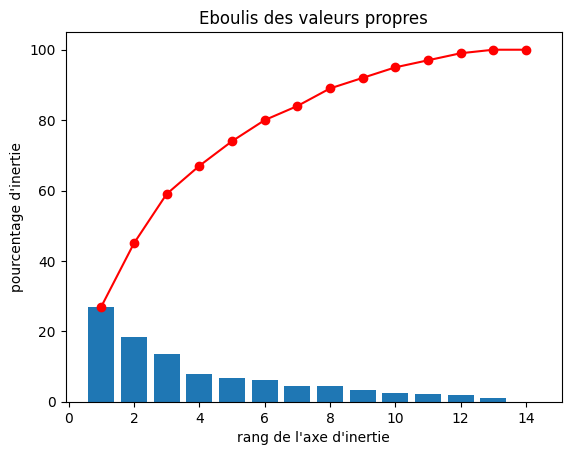

In [288]:
plt.bar(x_list, scree)
plt.plot(x_list, scree_cum,c="red",marker='o')
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.show(block=False)

L'éboulis des valeurs propres montre que 7 composantes principales expliquent 84% de l'inertie

In [289]:
pcs = pca.components_

In [290]:
pcs = pd.DataFrame(pcs)
pcs

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.056629,0.121423,0.221104,-0.032643,0.209018,0.443483,0.392685,0.204195,0.445203,0.449448,-0.022277,-0.168783,0.052606,-0.055609,0.246537
1,-0.153866,-0.350164,-0.371435,0.080900,-0.134018,0.227424,0.101421,-0.103001,0.227649,0.224311,0.271462,0.355373,-0.268613,-0.310141,-0.384918
2,-0.089764,0.316749,0.206846,0.074450,0.340805,-0.106539,-0.140352,0.114560,-0.105511,-0.125987,0.368036,-0.074729,-0.508787,-0.491502,0.120351
3,0.438499,-0.317658,0.016838,-0.398339,-0.211504,-0.032188,-0.031385,0.552836,-0.031231,-0.072670,-0.227738,-0.110349,-0.304844,-0.168176,-0.062927
4,0.500996,0.039506,0.077854,0.790687,-0.290140,-0.006644,0.068902,-0.022360,-0.008556,0.005919,-0.079158,-0.035427,-0.062816,-0.120165,0.026594
5,0.589784,0.228421,0.037394,-0.210130,0.348419,-0.081907,0.235635,-0.090692,-0.074778,-0.024543,0.219866,0.445444,0.172304,0.068017,-0.274413
6,0.288774,-0.022795,-0.183583,-0.275554,-0.256114,-0.010152,0.121332,-0.483423,-0.015493,0.047525,0.420836,-0.531607,-0.086492,0.004322,0.150442
7,0.021409,0.057644,-0.345594,0.165482,-0.009731,0.050829,-0.192375,0.568498,0.036106,-0.027102,0.569050,-0.077021,0.194053,0.335333,0.068041
8,0.066496,-0.438486,-0.368484,0.203130,0.658696,-0.119021,0.178998,-0.020966,-0.113802,-0.074224,-0.158069,-0.305732,0.053875,-0.067774,0.036406
9,-0.243133,0.003931,0.309702,0.076786,-0.105804,-0.164639,0.486326,0.182788,-0.150015,-0.064160,0.149805,-0.344213,0.079668,0.039676,-0.596128


In [291]:
pcs.columns = features
pcs.index = [f"F{i}" for i in x_list]
pcs.round(2)

,Quantite_exporte_de_france,Stabilite_politique,PIB_par_hab_2017_euro,Evo_PIB_5ans,Dispo_alim(Kg/Pers/an),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture_total,Production,Distance_france,Droit de douane,tva,taux_impot_sur_vente,Doing_business_index
F1,0.06,0.12,0.22,-0.03,0.21,0.44,0.39,0.20,0.45,0.45,-0.02,-0.17,0.05,-0.06,0.25
F2,-0.15,-0.35,-0.37,0.08,-0.13,0.23,0.10,-0.10,0.23,0.22,0.27,0.36,-0.27,-0.31,-0.38
F3,-0.09,0.32,0.21,0.07,0.34,-0.11,-0.14,0.11,-0.11,-0.13,0.37,-0.07,-0.51,-0.49,0.12
F4,0.44,-0.32,0.02,-0.40,-0.21,-0.03,-0.03,0.55,-0.03,-0.07,-0.23,-0.11,-0.30,-0.17,-0.06
F5,0.50,0.04,0.08,0.79,-0.29,-0.01,0.07,-0.02,-0.01,0.01,-0.08,-0.04,-0.06,-0.12,0.03
F6,0.59,0.23,0.04,-0.21,0.35,-0.08,0.24,-0.09,-0.07,-0.02,0.22,0.45,0.17,0.07,-0.27
F7,0.29,-0.02,-0.18,-0.28,-0.26,-0.01,0.12,-0.48,-0.02,0.05,0.42,-0.53,-0.09,0.00,0.15
F8,0.02,0.06,-0.35,0.17,-0.01,0.05,-0.19,0.57,0.04,-0.03,0.57,-0.08,0.19,0.34,0.07
F9,0.07,-0.44,-0.37,0.20,0.66,-0.12,0.18,-0.02,-0.11,-0.07,-0.16,-0.31,0.05,-0.07,0.04
F10,-0.24,0.00,0.31,0.08,-0.11,-0.16,0.49,0.18,-0.15,-0.06,0.15,-0.34,0.08,0.04,-0.60


In [292]:
#on transpose le données
pcst = pcs.T.round(2)
pcst

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14
Quantite_exporte_de_france,0.06,-0.15,-0.09,0.44,0.50,0.59,0.29,0.02,0.07,-0.24,0.10,0.12,0.05,-0.00
Stabilite_politique,0.12,-0.35,0.32,-0.32,0.04,0.23,-0.02,0.06,-0.44,0.00,-0.51,0.38,-0.07,0.00
PIB_par_hab_2017_euro,0.22,-0.37,0.21,0.02,0.08,0.04,-0.18,-0.35,-0.37,0.31,0.57,-0.20,0.09,0.00
Evo_PIB_5ans,-0.03,0.08,0.07,-0.40,0.79,-0.21,-0.28,0.17,0.20,0.08,0.07,0.01,-0.06,-0.00
Dispo_alim(Kg/Pers/an),0.21,-0.13,0.34,-0.21,-0.29,0.35,-0.26,-0.01,0.66,-0.11,0.19,0.16,-0.04,0.00
Disponibilité intérieure,0.44,0.23,-0.11,-0.03,-0.01,-0.08,-0.01,0.05,-0.12,-0.16,0.12,0.20,0.06,0.34
Exportations - Quantité,0.39,0.10,-0.14,-0.03,0.07,0.24,0.12,-0.19,0.18,0.49,-0.38,-0.42,-0.30,-0.07
Importations - Quantité,0.20,-0.10,0.11,0.55,-0.02,-0.09,-0.48,0.57,-0.02,0.18,-0.15,-0.07,0.02,0.03
Nourriture_total,0.45,0.23,-0.11,-0.03,-0.01,-0.07,-0.02,0.04,-0.11,-0.15,0.11,0.19,0.04,-0.79
Production,0.45,0.22,-0.13,-0.07,0.01,-0.02,0.05,-0.03,-0.07,-0.06,0.04,0.10,-0.01,0.50


In [293]:
#analyse exploratoire des données avec la librairie dataprep

report = create_report(pcst, title='My Report')
report

Output hidden; open in https://colab.research.google.com to view.

<Axes: >

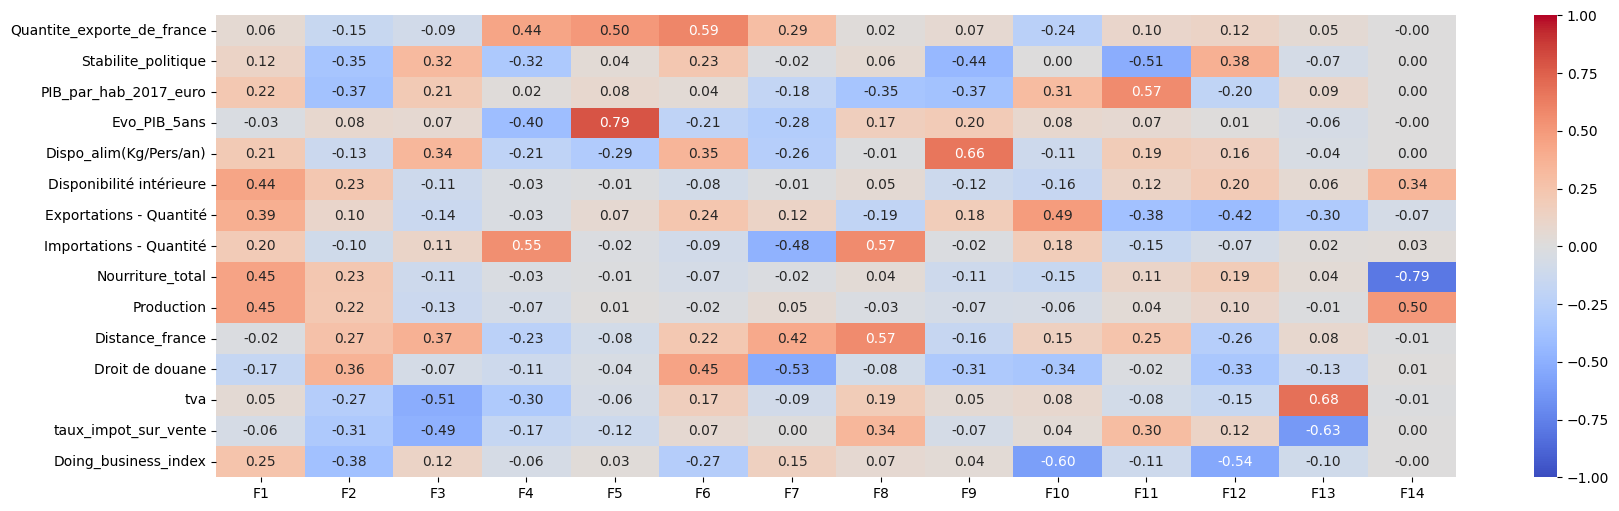

In [294]:
# Affichage du heatmap des correlations
fig, ax = plt.subplots(figsize=(20, 6))
sns.heatmap(pcst, vmin=-1, vmax=1, annot=True, cmap="coolwarm", fmt="0.2f")

Fonction permettant de tracer les cercles de correlation

In [295]:
def correlation_graph(pca,
                      x_y,
                      features) :# code repris du cours d'Openclassroom
    """Affiche le graphe des correlations

    Positional arguments :
    -----------------------------------
    pca : sklearn.decomposition.PCA : notre objet PCA qui a été fit
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2
    features : list ou tuple : la liste des features (ie des dimensions) à représenter
    """

    # Extrait x et y
    x,y=x_y

    # Taille de l'image (en inches)
    fig, ax = plt.subplots(figsize=(10, 9))

    # Pour chaque composante :
    for i in range(0, pca.components_.shape[1]):

        # Les flèches
        ax.arrow(0,0,
                pca.components_[x, i],
                pca.components_[y, i],
                head_width=0.02,
                head_length=0.02,
                width=0.01, )

        # Les labels
        plt.text(pca.components_[x, i] + 0.02,
                pca.components_[y, i] + 0.02,
                features[i])

    # Affichage des lignes horizontales et verticales
    plt.plot([-1, 1], [0, 0], color='grey', ls='--')
    plt.plot([0, 0], [-1, 1], color='grey', ls='--')

    # Nom des axes, avec le pourcentage d'inertie expliqué
    plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
    plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

    plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))

    # Le cercle
    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale

    # Axes et display
    plt.axis('equal')
    plt.show(block=False)

In [296]:
#projetion des données sur les axes principaux de l'ACP
X_proj = pca.transform(X_scaled)
#X_proj[:5]

Fonction permettant d'afficher les plans factoriels

In [297]:
def display_factorial_planes(   X_projected,
                                x_y,
                                pca=None,
                                labels = None,
                                clusters=None,
                                alpha=1,
                                figsize=[10,8],
                                marker="." ):# code repris d'openclassroom
    """
    Affiche la projection des individus

    Positional arguments :
    -------------------------------------
    X_projected : np.array, pd.DataFrame, list of list : la matrice des points projetés
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2

    Optional arguments :
    -------------------------------------
    pca : sklearn.decomposition.PCA : un objet PCA qui a été fit, cela nous permettra d'afficher la variance de chaque composante, default = None
    labels : list ou tuple : les labels des individus à projeter, default = None
    clusters : list ou tuple : la liste des clusters auquel appartient chaque individu, default = None
    alpha : float in [0,1] : paramètre de transparence, 0=100% transparent, 1=0% transparent, default = 1
    figsize : list ou tuple : couple width, height qui définit la taille de la figure en inches, default = [10,8]
    marker : str : le type de marker utilisé pour représenter les individus, points croix etc etc, default = "."
    """

    # Transforme X_projected en np.array
    X_ = np.array(X_projected)

    # On définit la forme de la figure si elle n'a pas été donnée
    if not figsize:
        figsize = (7,6)

    # On gère les labels
    if  labels is None :
        labels = []
    try :
        len(labels)
    except Exception as e :
        raise e

    # On vérifie la variable axis
    if not len(x_y) ==2 :
        raise AttributeError("2 axes sont demandées")
    if max(x_y )>= X_.shape[1] :
        raise AttributeError("la variable axis n'est pas bonne")

    # on définit x et y
    x, y = x_y

    # Initialisation de la figure
    fig, ax = plt.subplots(1, 1, figsize=figsize)

    # On vérifie s'il y a des clusters ou non
    c = None if clusters is None else clusters

    # Les points
    # plt.scatter(   X_[:, x], X_[:, y], alpha=alpha,
    #                     c=c, cmap="Set1", marker=marker)
    sns.scatterplot(data=None, x=X_[:, x], y=X_[:, y], hue=c)

    # Si la variable pca a été fournie, on peut calculer le % de variance de chaque axe
    if pca :
        v1 = str(round(100*pca.explained_variance_ratio_[x]))  + " %"
        v2 = str(round(100*pca.explained_variance_ratio_[y]))  + " %"
    else :
        v1=v2= ''

    # Nom des axes, avec le pourcentage d'inertie expliqué
    ax.set_xlabel(f'F{x+1} {v1}')
    ax.set_ylabel(f'F{y+1} {v2}')

    # Valeur x max et y max
    x_max = np.abs(X_[:, x]).max() *1.1
    y_max = np.abs(X_[:, y]).max() *1.1

    # On borne x et y
    ax.set_xlim(left=-x_max, right=x_max)
    ax.set_ylim(bottom= -y_max, top=y_max)

    # Affichage des lignes horizontales et verticales
    plt.plot([-x_max, x_max], [0, 0], color='grey', alpha=0.8)
    plt.plot([0,0], [-y_max, y_max], color='grey', alpha=0.8)

    # Affichage des labels des points
    if len(labels) :
        # j'ai copié collé la fonction sans la lire
        for i,(_x,_y) in enumerate(X_[:,[x,y]]):
            plt.text(_x, _y+0.05, labels[i], fontsize='14', ha='center',va='center')

    # Titre et display
    plt.title(f"Projection des individus (sur F{x+1} et F{y+1})")
    plt.show()



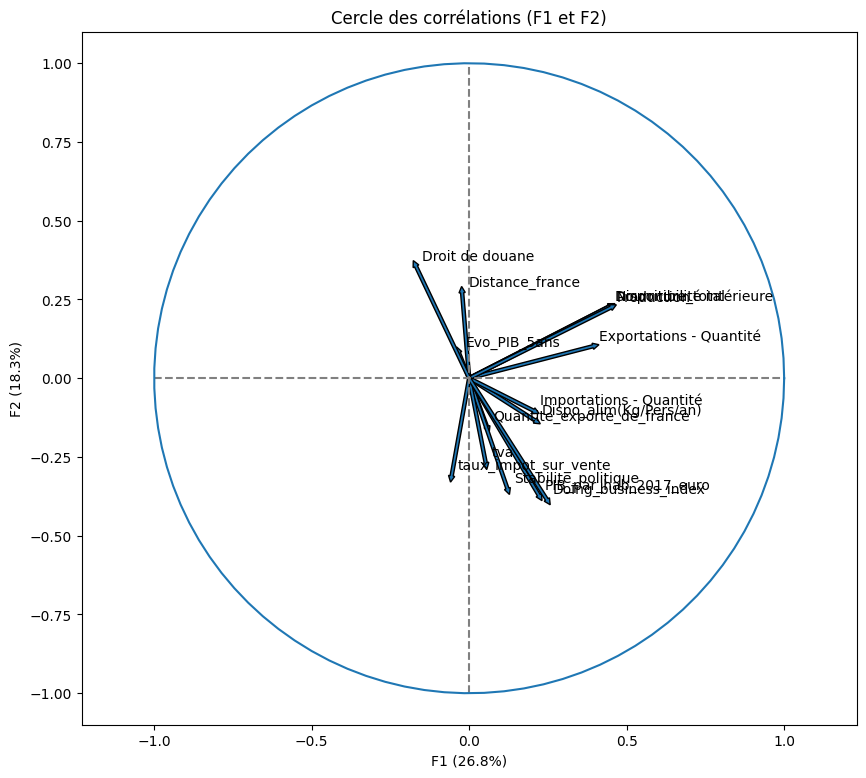

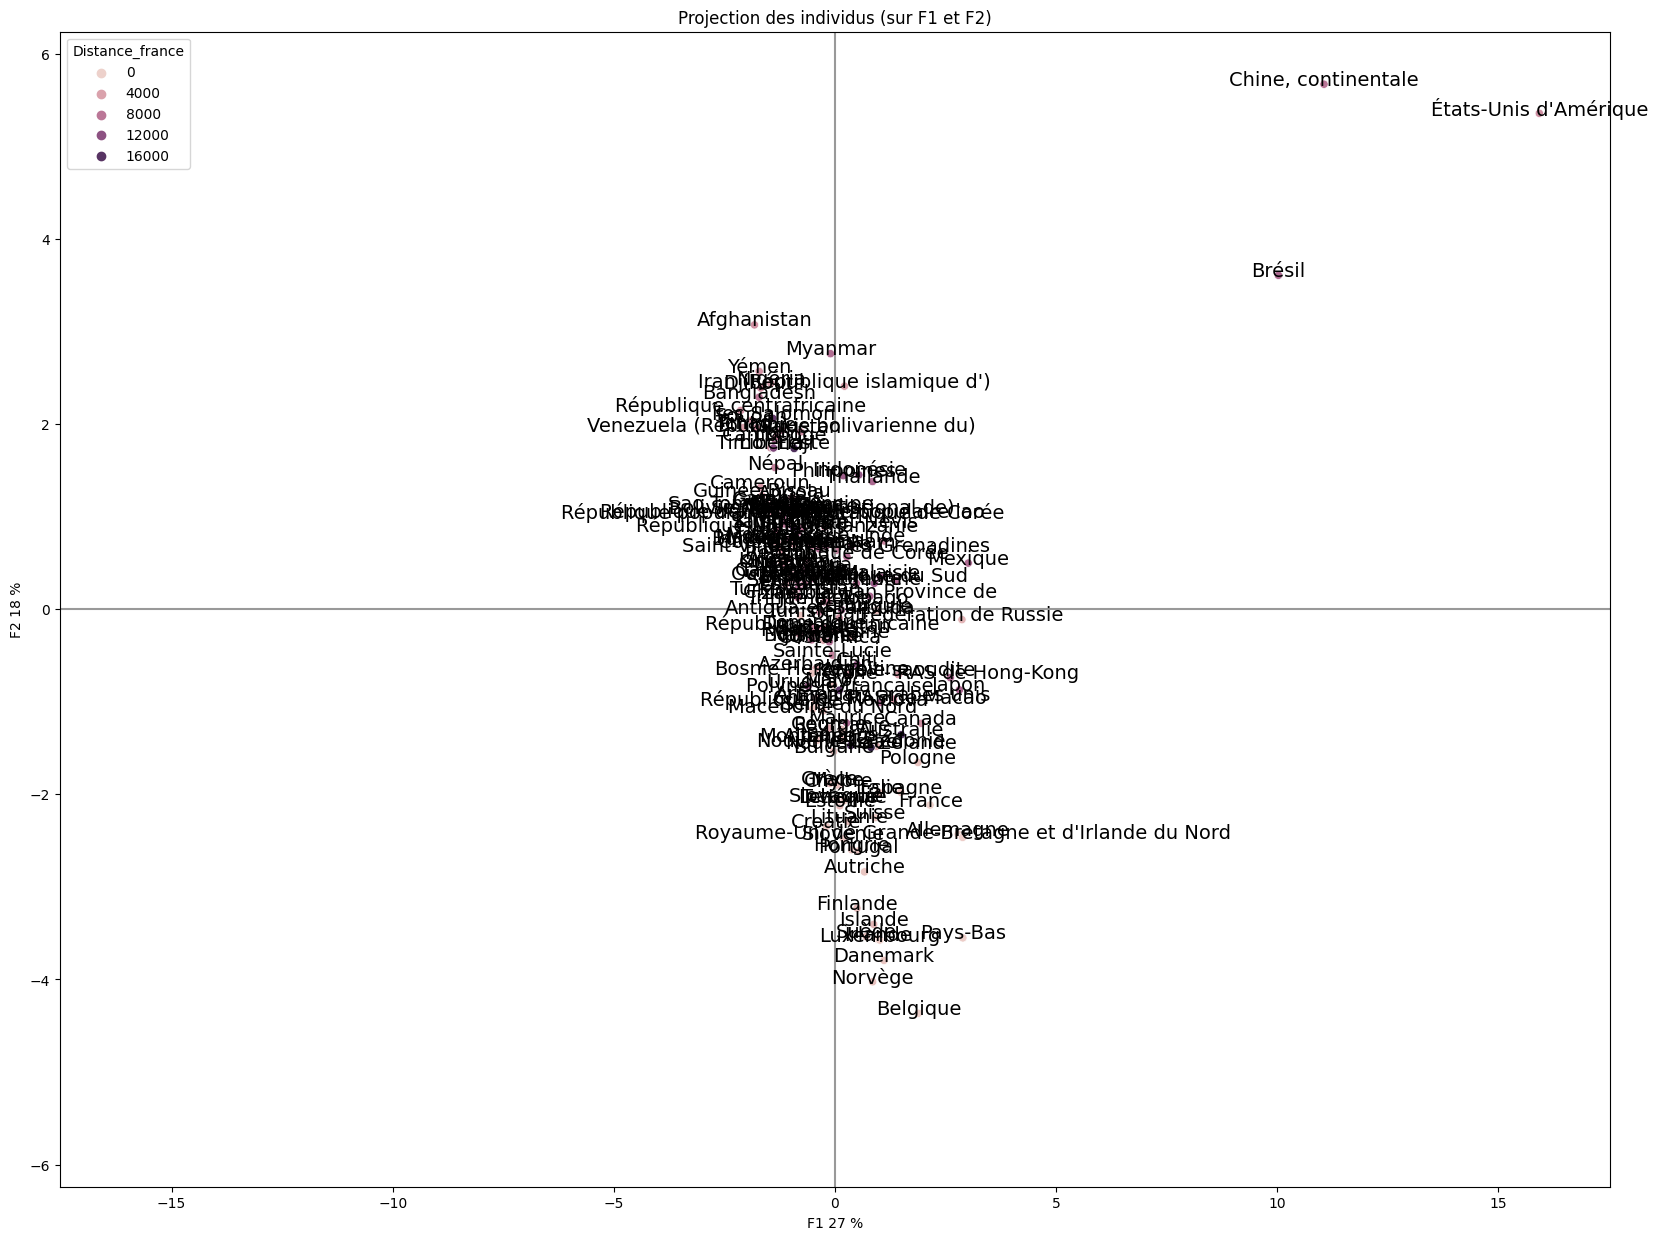

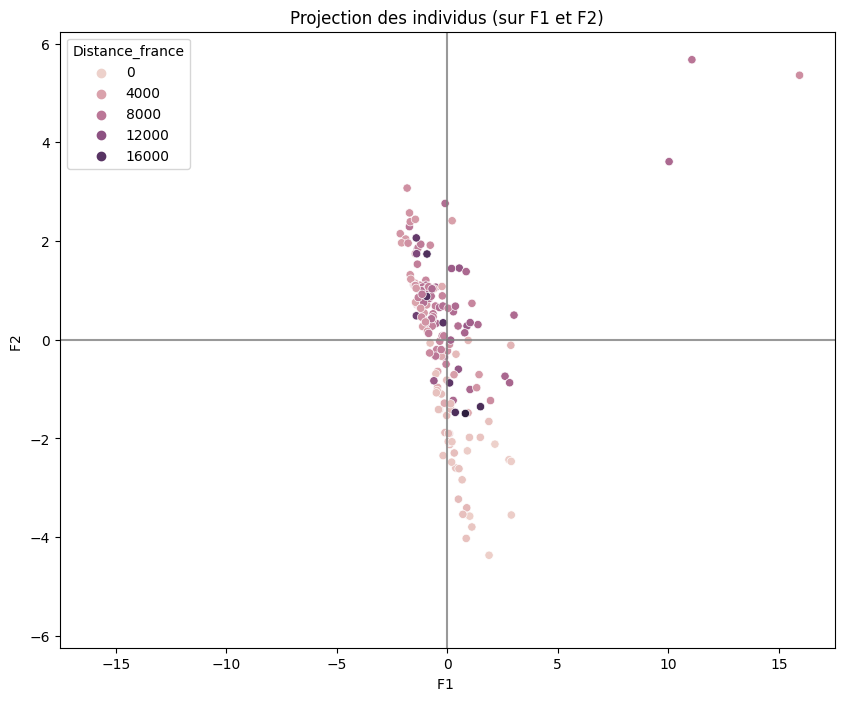

In [298]:
x_y = [0,1] #F1 et F2
correlation_graph(pca, x_y, features)
display_factorial_planes(X_proj, x_y, pca, labels=names, figsize=(20,15), clusters=df['Distance_france'], marker="o")
display_factorial_planes(X_proj, x_y, clusters=df['Distance_france'])


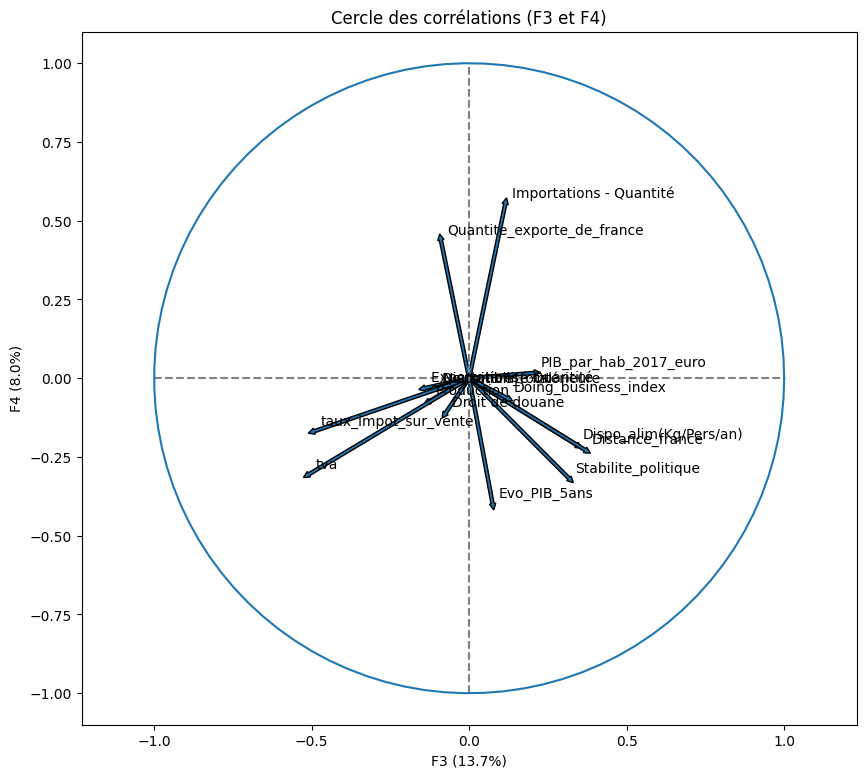

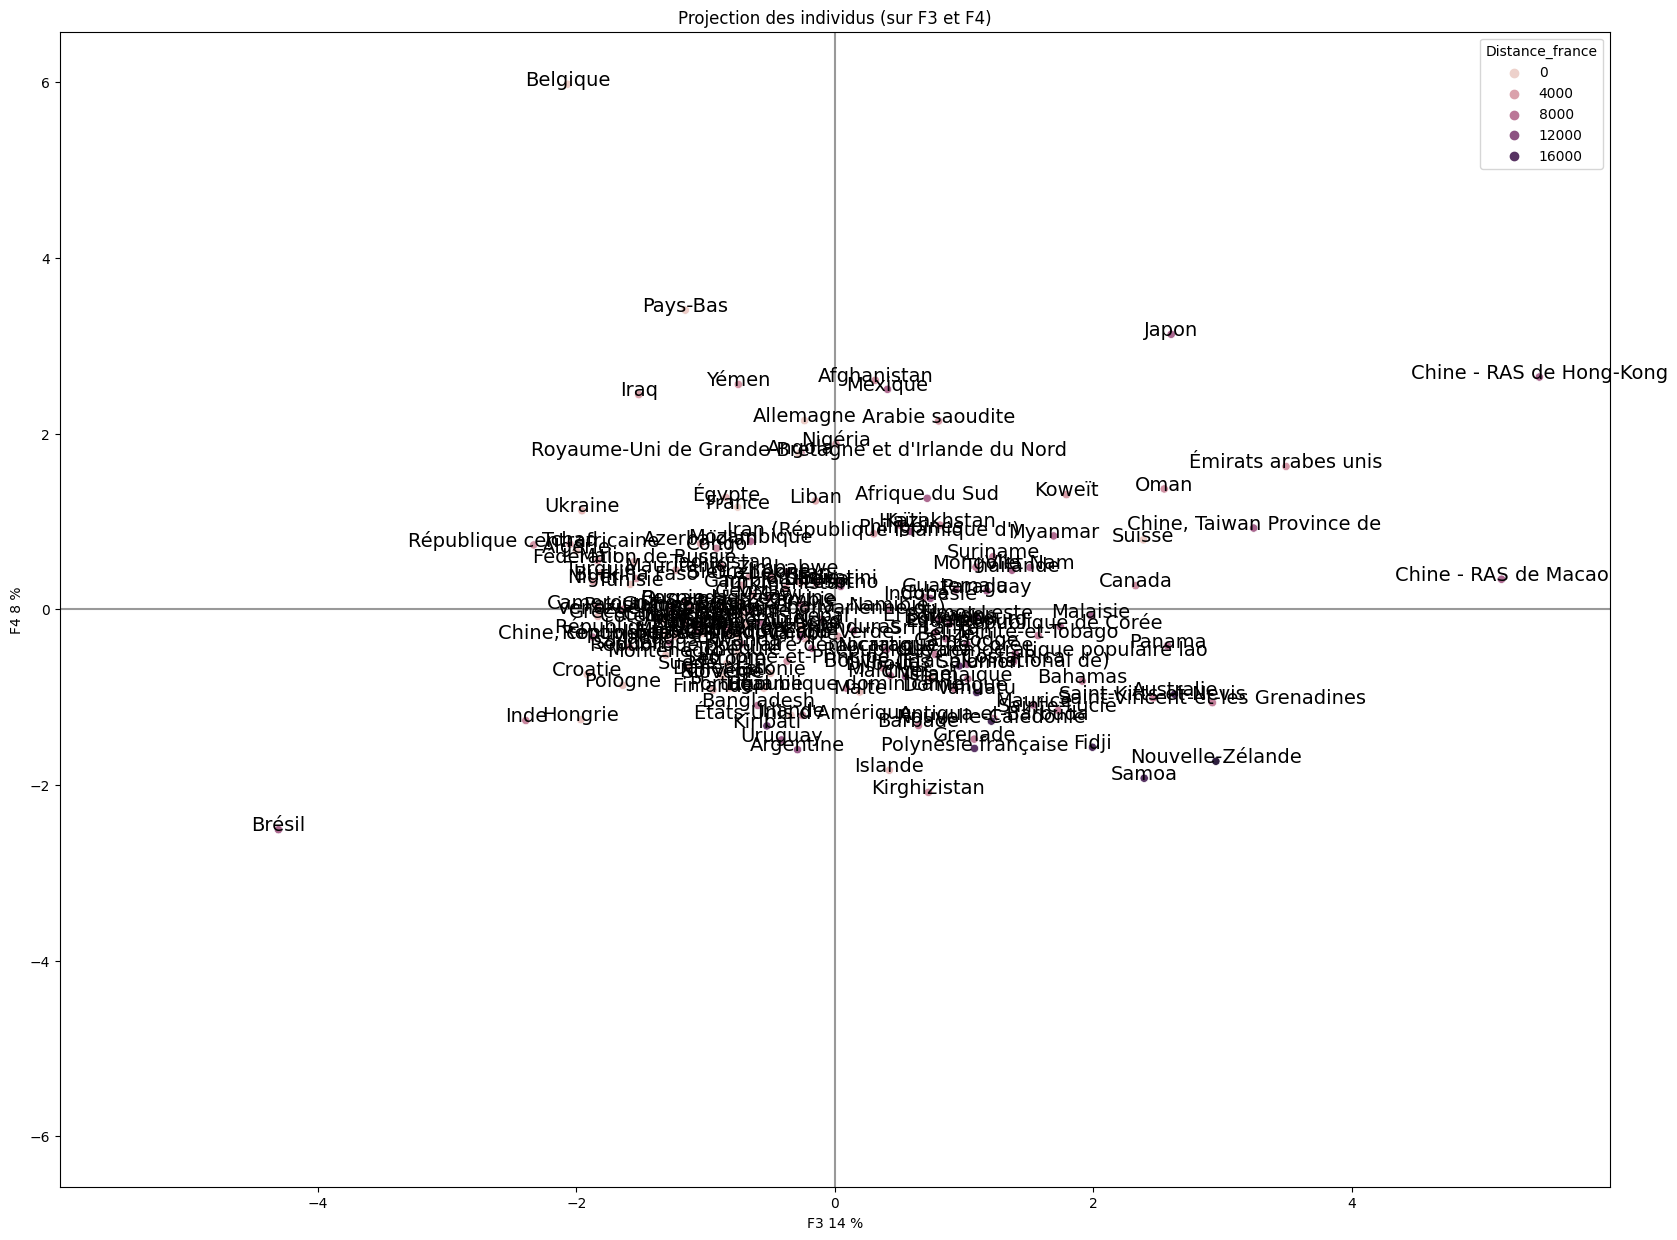

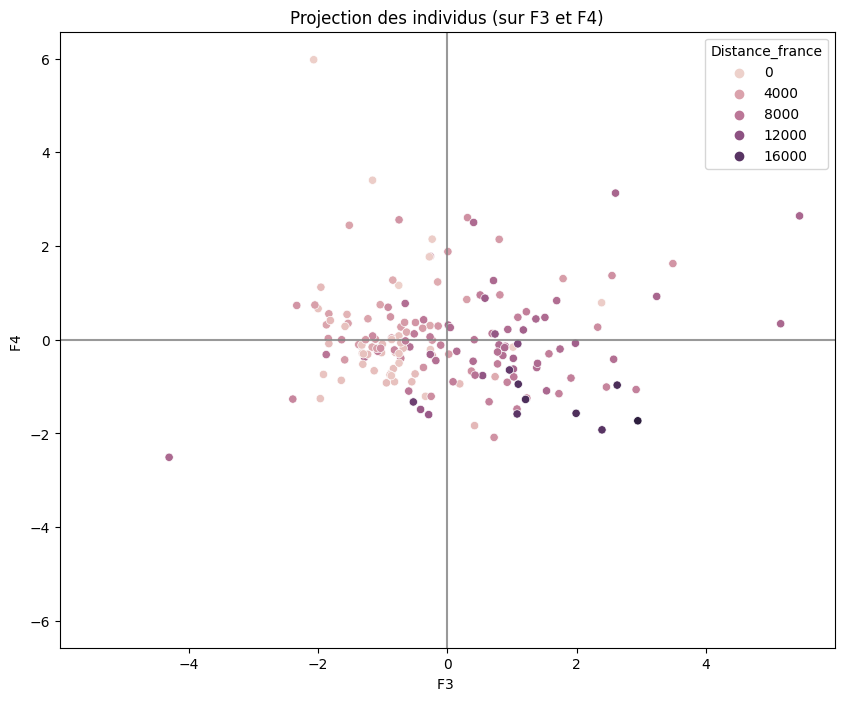

In [299]:
x_y = 2,3 #F3 et F4
correlation_graph(pca, x_y, features)
display_factorial_planes(X_proj, x_y, pca, labels=names, figsize=(20,15), clusters=df['Distance_france'],marker="o")
display_factorial_planes(X_proj, x_y, clusters=df['Distance_france'])


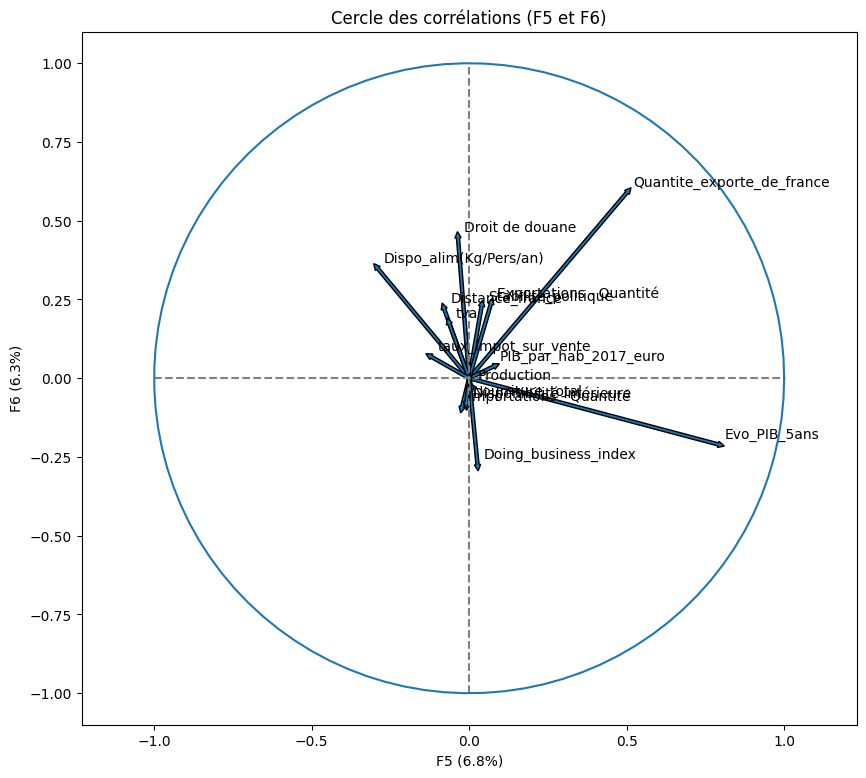

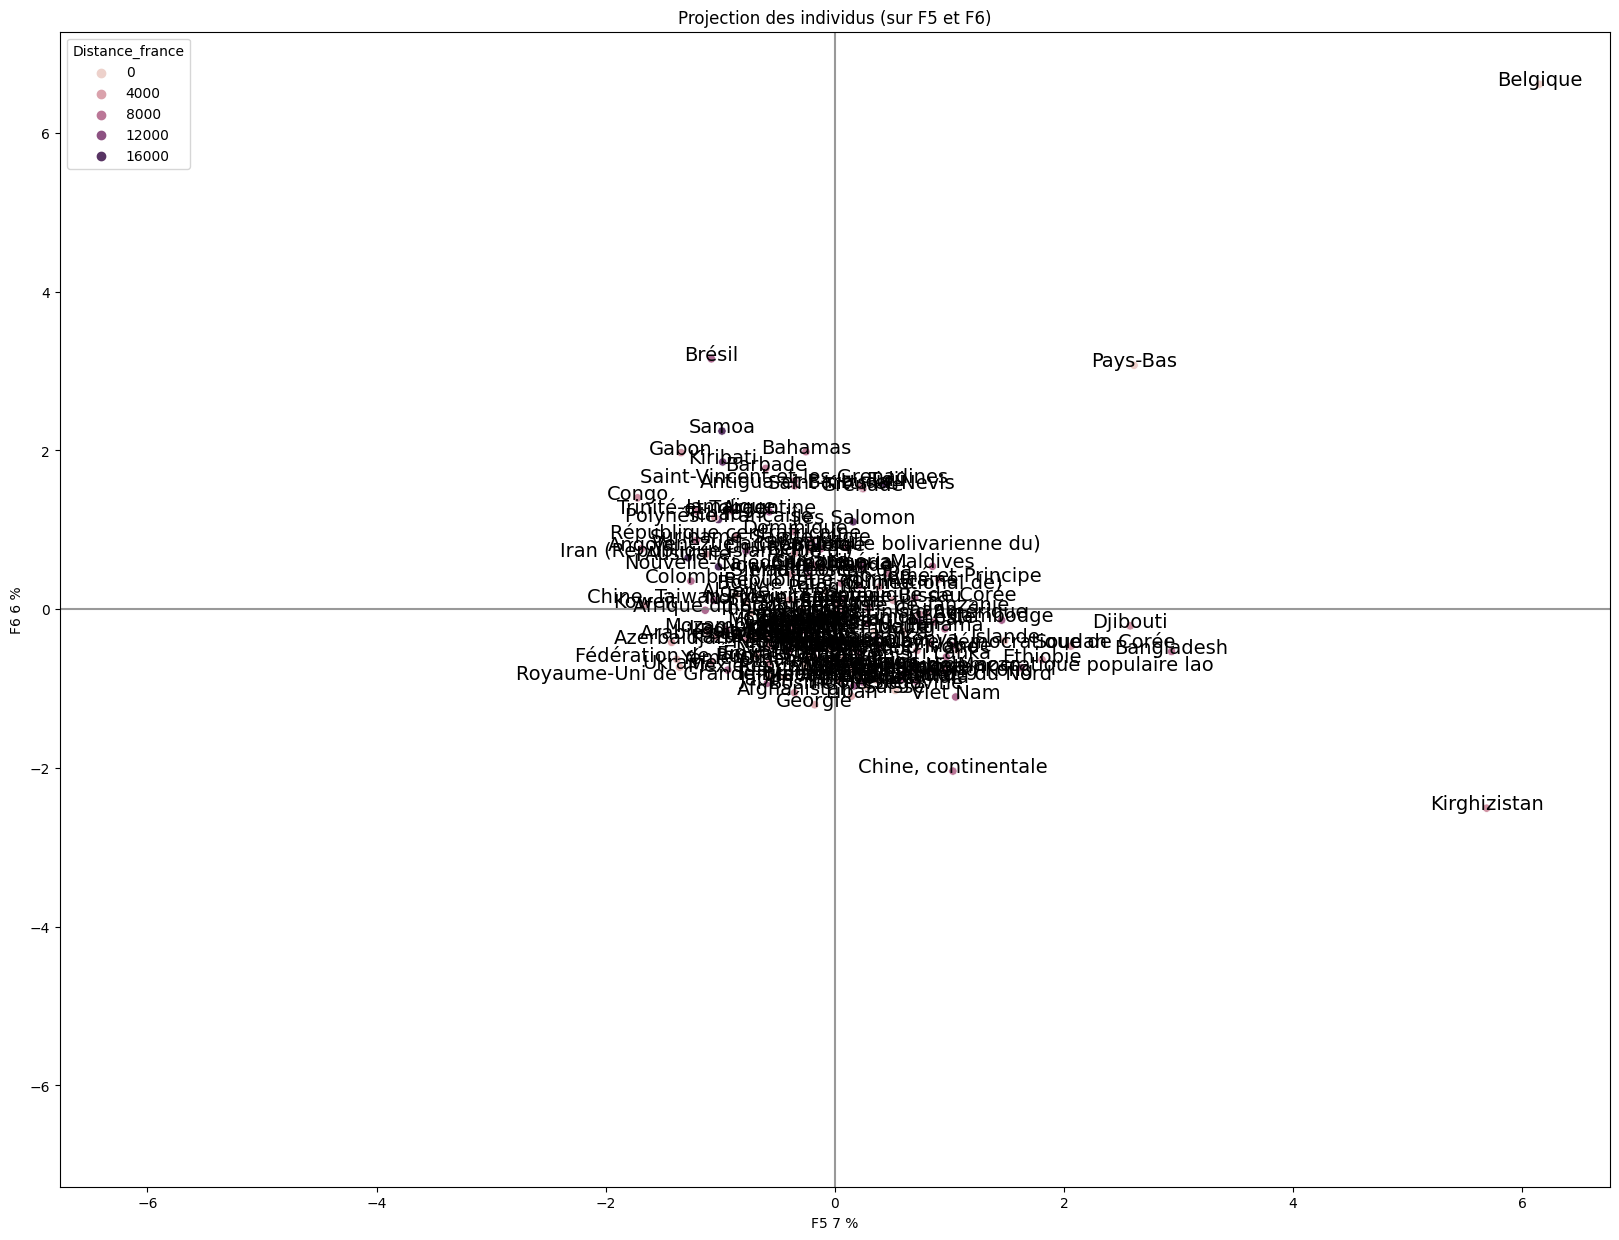

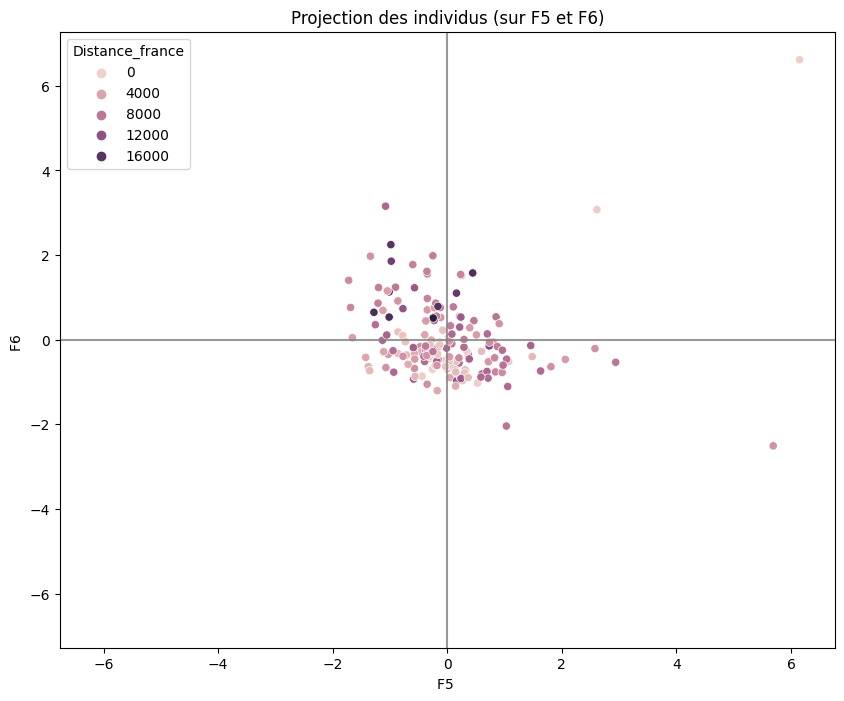

In [300]:
x_y = (4,5) # on veut le cercle de correlation entre F5 et F6
correlation_graph(pca, x_y, features)
display_factorial_planes(X_proj, x_y, pca, labels=names, figsize=(20,15), clusters=df['Distance_france'],marker="o")
display_factorial_planes(X_proj, x_y, clusters=df['Distance_france'])


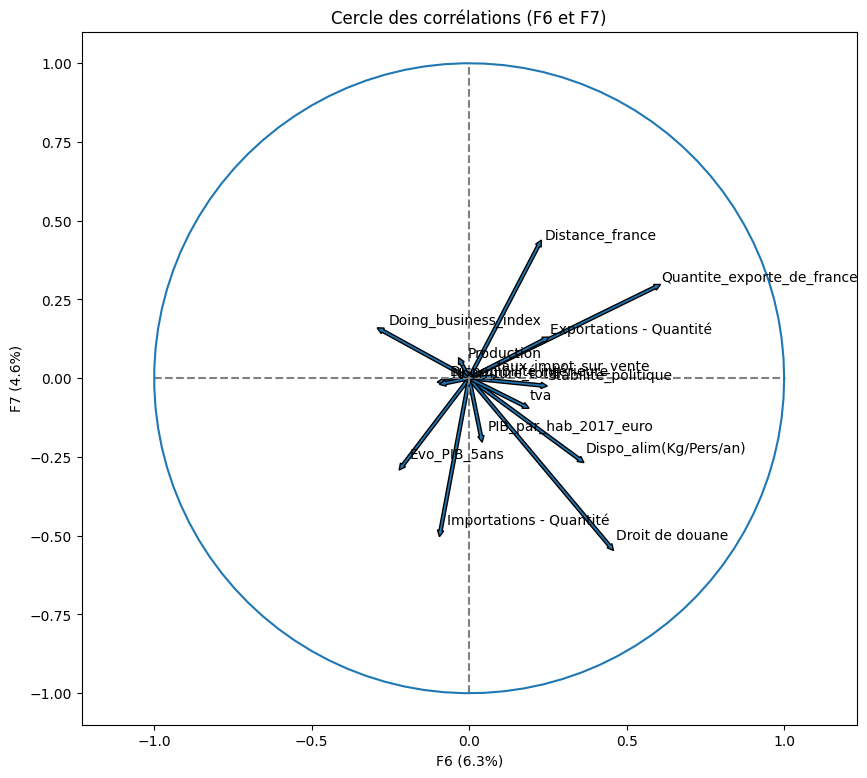

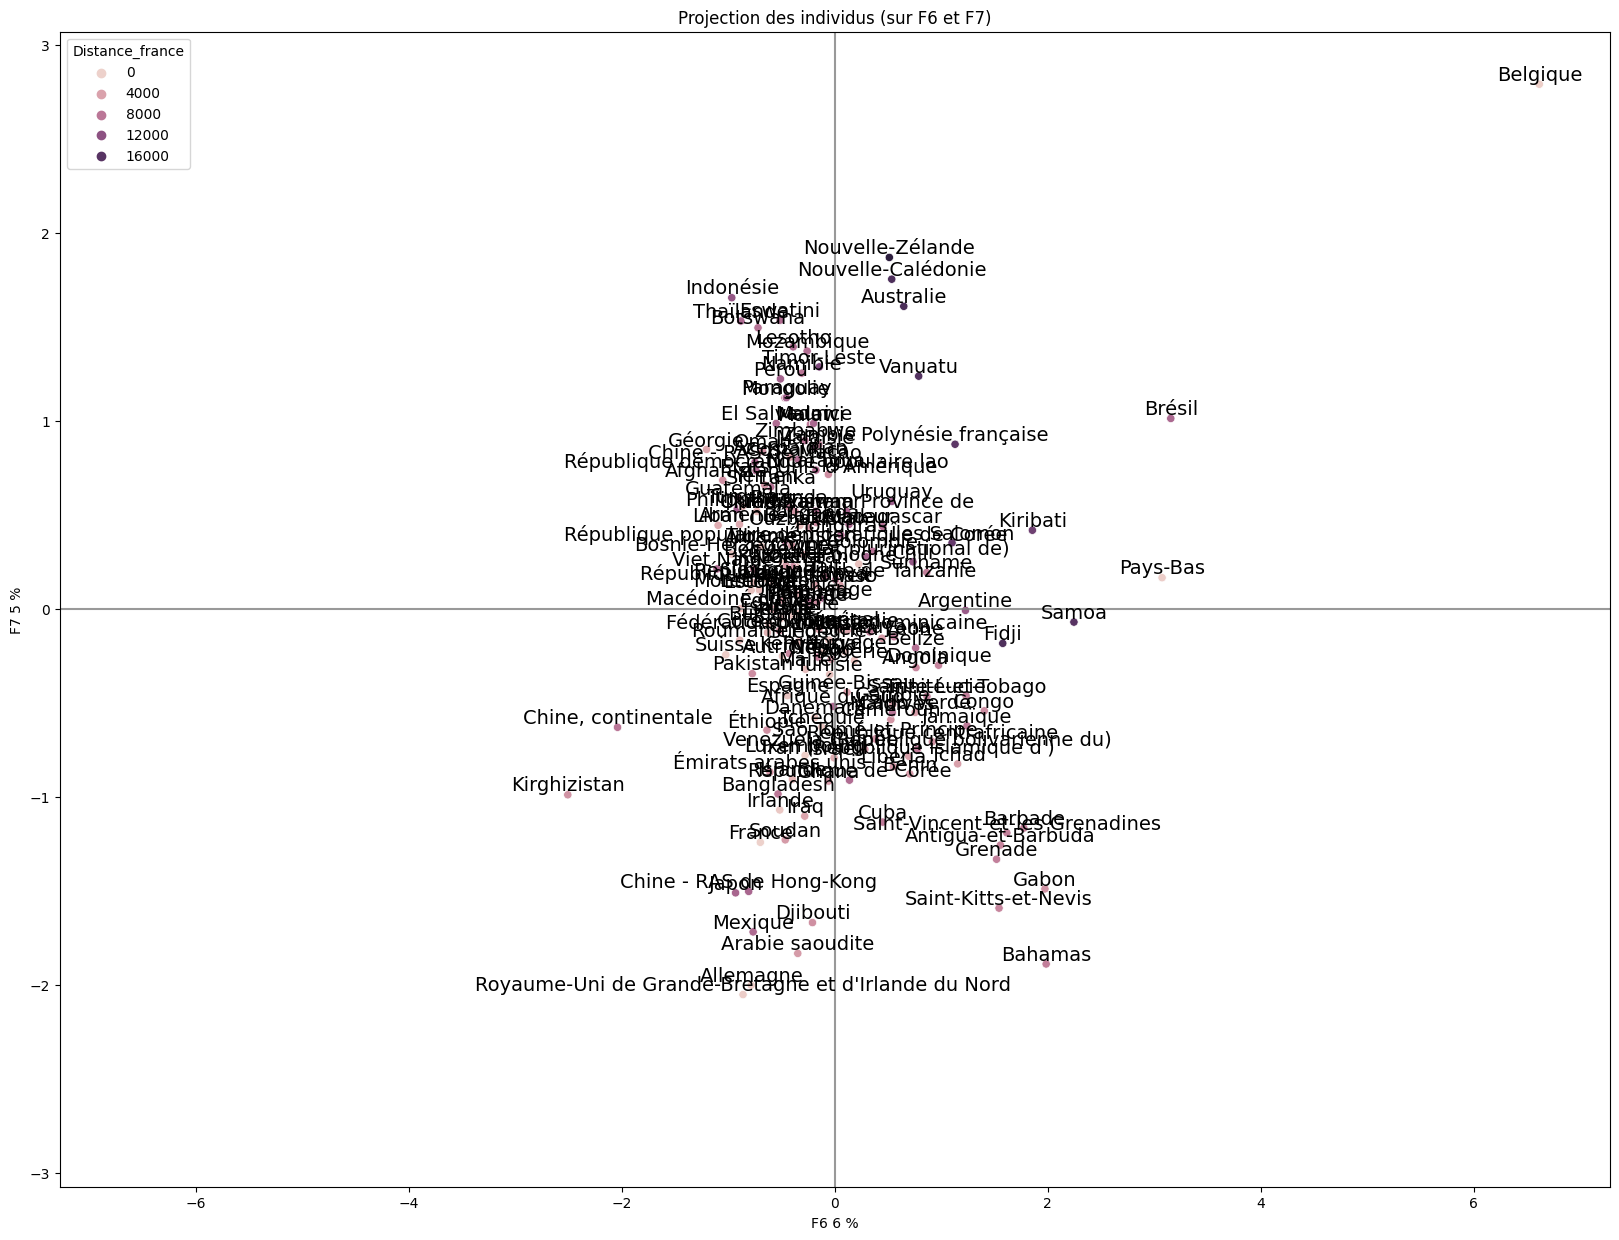

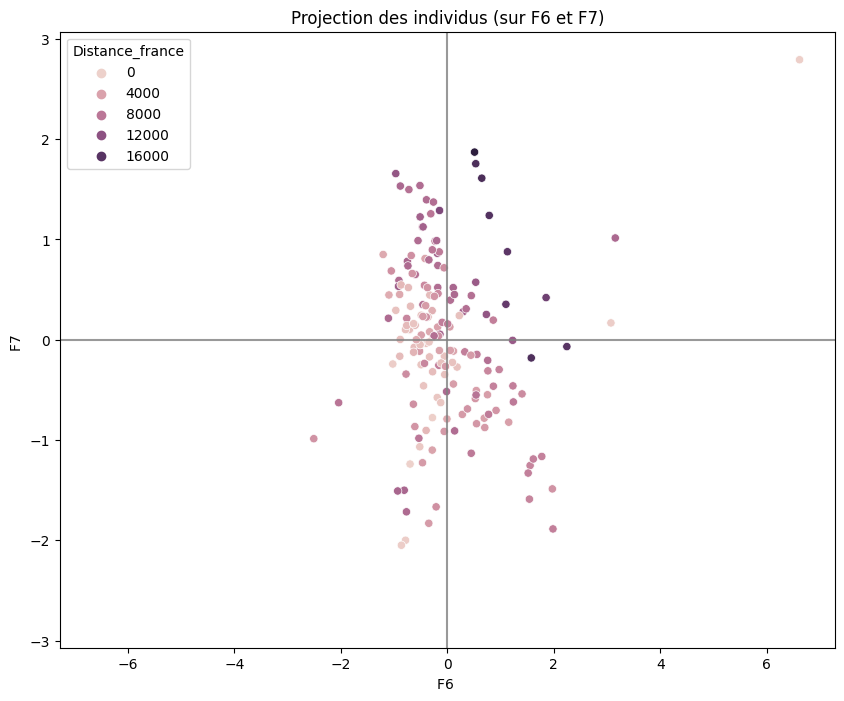

In [301]:
x_y = (5,6) # on veut le cercle de correlation entre F6 et F7
correlation_graph(pca, x_y, features)
display_factorial_planes(X_proj, x_y, pca, labels=names, figsize=(20,15), clusters=df['Distance_france'],marker="o")
display_factorial_planes(X_proj, x_y, clusters=df['Distance_france'])

Identification des axes principaux d'inertie:
* F1 représente la disponibilité alimentaire d’un pays
* F2 représente le niveau de développement d’un pays
* F3 représente la diversité alimentaire d’un pays
* F4 représente l’évolution économique d’un pays
* F5 représente l’instabilité économique d’un pays
* F6 représente la dépendance alimentaire d’un pays
* F7 représente la compétitivité alimentaire d’un pays (rapport entre quantité de nourriture exporté et quantité de nourriture produite)


Classement des pays par axe d'inertie

In [302]:
ranking_F1 = sorted(zip(names, X_proj[:, 0]), key=lambda x: x[1], reverse=True)
ranking_F2 = sorted(zip(names, X_proj[:, 1]), key=lambda x: x[1], reverse=True)
ranking_F3 = sorted(zip(names, X_proj[:, 2]), key=lambda x: x[1], reverse=True)
ranking_F4 = sorted(zip(names, X_proj[:, 3]), key=lambda x: x[1], reverse=True)
ranking_F5 = sorted(zip(names, X_proj[:, 4]), key=lambda x: x[1], reverse=True)
ranking_F6 = sorted(zip(names, X_proj[:, 5]), key=lambda x: x[1], reverse=True)
ranking_F7 = sorted(zip(names, X_proj[:, 6]), key=lambda x: x[1], reverse=True)

In [303]:
def create_ranking_df(ranking, col_name):
    df_ranking = pd.DataFrame(ranking, columns=['Pays', col_name])
    df_ranking['Position_' + col_name] = df_ranking[col_name].rank(ascending=False)
    return df_ranking

# Création des DataFrames de classement avec position
df_F1 = create_ranking_df(ranking_F1, 'Classement_F1')
df_F2 = create_ranking_df(ranking_F2, 'Classement_F2')
df_F3 = create_ranking_df(ranking_F3, 'Classement_F3')
df_F4 = create_ranking_df(ranking_F4, 'Classement_F4')
df_F5 = create_ranking_df(ranking_F5, 'Classement_F5')
df_F6 = create_ranking_df(ranking_F6, 'Classement_F6')
df_F7 = create_ranking_df(ranking_F6, 'Classement_F7')

In [304]:
df_F1 = pd.DataFrame(ranking_F1, columns=['Pays', 'Classement_F1'])
df_F2 = pd.DataFrame(ranking_F2, columns=['Pays', 'Classement_F2'])
df_F3 = pd.DataFrame(ranking_F3, columns=['Pays', 'Classement_F3'])
df_F4 = pd.DataFrame(ranking_F4, columns=['Pays', 'Classement_F4'])
df_F5 = pd.DataFrame(ranking_F5, columns=['Pays', 'Classement_F5'])
df_F6 = pd.DataFrame(ranking_F6, columns=['Pays', 'Classement_F6'])
df_F7 = pd.DataFrame(ranking_F7, columns=['Pays', 'Classement_F7'])
# Fusion des DataFrames en fonction du nom des pays
df_classements = pd.merge(df_F1, df_F2, on='Pays').merge(df_F3, on='Pays').merge(df_F4, on='Pays').merge(df_F5, on='Pays').merge(df_F6, on='Pays').merge(df_F7, on='Pays')

# Affichage du DataFrame résultant
df_classements

,Pays,Classement_F1,Classement_F2,Classement_F3,Classement_F4,Classement_F5,Classement_F6,Classement_F7
0,États-Unis d'Amérique,15.936050,5.357465,-0.249423,-1.208750,0.736056,-0.060227,0.717052
1,"Chine, continentale",11.065949,5.671748,-1.873399,-0.317044,1.030943,-2.039642,-0.627897
2,Brésil,10.034495,3.607541,-4.304212,-2.509175,-1.077042,3.154881,1.014572
3,Mexique,3.018684,0.498399,0.407819,2.502934,-0.934123,-0.766653,-1.716010
4,Pays-Bas,2.896723,-3.550574,-1.156345,3.404279,2.612803,3.073153,0.167730
...,...,...,...,...,...,...,...,...
167,Éthiopie,-1.772016,1.956735,-1.031440,-0.181431,1.809384,-0.636779,-0.642694
168,Afghanistan,-1.816688,3.071939,0.313241,2.605710,-0.351171,-1.051523,0.685968
169,Soudan,-1.881180,2.039621,-1.587210,-0.429369,2.060759,-0.465093,-1.226487
170,Tchad,-2.065320,1.962675,-2.048668,0.741354,-1.046594,1.153931,-0.822251


In [305]:
# Remplacer chaque valeur des colonnes 1 à 7 par son indice de classement dans la colonne
for i in range(1, 7):
    df_classements[f'Classement_F{i}'] = df_classements[f'Classement_F{i}'].rank(method='min', ascending=False)

classement=pd.DataFrame(df_classements)
classement = classement.round(0)
classement

,Pays,Classement_F1,Classement_F2,Classement_F3,Classement_F4,Classement_F5,Classement_F6,Classement_F7
0,États-Unis d'Amérique,1.0,2.0,83.0,156.0,24.0,68.0,1.0
1,"Chine, continentale",2.0,1.0,163.0,110.0,14.0,171.0,-1.0
2,Brésil,3.0,3.0,172.0,172.0,158.0,2.0,1.0
3,Mexique,4.0,74.0,64.0,7.0,148.0,150.0,-2.0
4,Pays-Bas,5.0,167.0,139.0,2.0,4.0,3.0,0.0
...,...,...,...,...,...,...,...,...
167,Éthiopie,168.0,15.0,132.0,93.0,7.0,137.0,-1.0
168,Afghanistan,169.0,4.0,67.0,5.0,118.0,167.0,1.0
169,Soudan,170.0,13.0,155.0,117.0,6.0,117.0,-1.0
170,Tchad,171.0,14.0,168.0,31.0,155.0,18.0,-1.0


# Kmeans

In [306]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=6)

on test d'abord avec 6 clusters et on va travailer sur une copy appelé X de df

In [307]:
X = df.copy()

In [308]:
#on entraine le model
kmeans.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=6)

In [309]:
#on peut calculer son inertie (somme des carrés des distances entre chaque point)
kmeans.inertia_

3.8366322463121015e+19

l'inertie étant très élevés, il semble que les points au point de chaque cluster sont dispersés sur de grande distances par rapport à leur centree

Evaluation du nombre de cluster par la méthode du coude

In [310]:
#on creer une liste vide pour enregistrer les inerties
inertia = []

In [311]:
# k=list : notre liste du nombre de cluster
k_list = range(1, 11)
list(k_list)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [312]:
#pour chaque nombre de cluster, on instancie un k_means pour k clusters puis on entraine le model et on enregistre l'inertie obtenue dans inertia
for i in k_list :
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(X)
  inertia.append(kmeans.inertia_)
  centroids  = kmeans.cluster_centers_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [313]:
inertia

[2.6705146286160237e+21,
 4.081357756117188e+20,
 2.0723244765656872e+20,
 9.525360865621231e+19,
 5.021388746427708e+19,
 3.8366322463121015e+19,
 2.707048542711695e+19,
 2.157686097811001e+19,
 1.9296108048877634e+19,
 1.6773876553520648e+19]

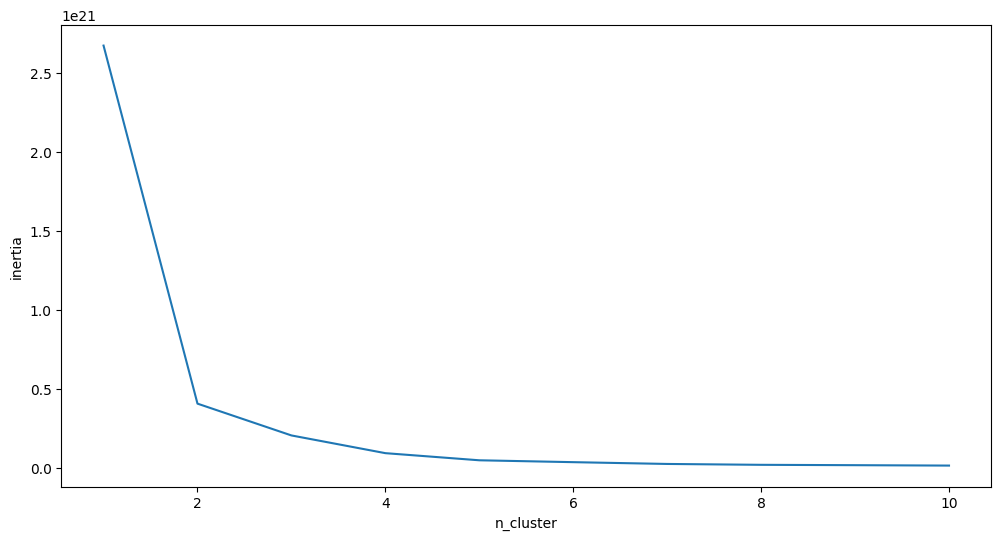

In [314]:
# affichage du graphique des inerties pour constater la cassure de la courbe
fig, ax = plt.subplots(1,1,figsize=(12,6))

ax.set_ylabel("inertia")
ax.set_xlabel("n_cluster")
ax = plt.plot(k_list, inertia)

In [315]:
#print("Dimensions des données:", X.shape)
#print("Dimensions des centroids:", centroids.shape)

La méthode du coude semble indiquer qu'il faut prendre 2 clusters. Vérifions cette indication par une autre méthode

In [316]:
#utilisation de la librairie kneed pour calculer le nombre de cluster
%pip install kneed
from kneed import KneeLocator

kl = KneeLocator(range(1, 11), inertia, curve="convex", direction="decreasing")

print(f'Nombre de cluster : {kl.elbow}')


Nombre de cluster : 2


L'utilisation de la librairie kneed qui permet d'identifier le point de coude d'une ligne ajustée aux données indique un nombre de cluster de 2

Evaluation du nombre de cluster par la méthode de la silhouette

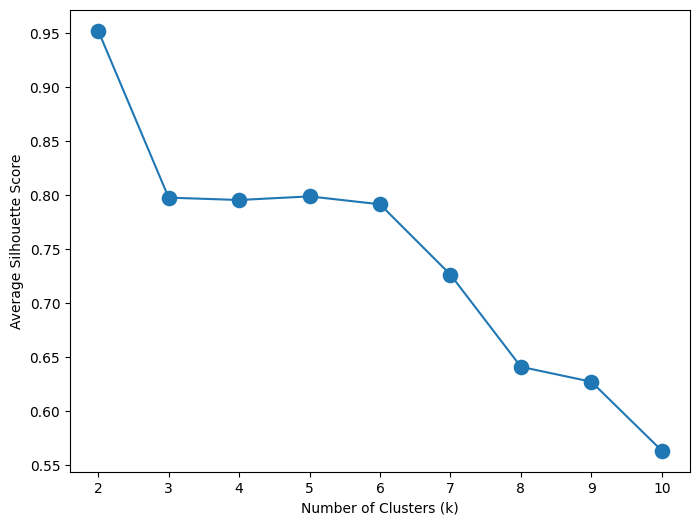

In [317]:
#The Average Silhouette Score
from sklearn.metrics import silhouette_score

silhouette = []

for k in range(2, 11):
    km = KMeans(n_clusters=k, n_init=25, random_state=1234)
    km.fit(X)
    silhouette.append(silhouette_score(X, km.labels_))

silhouette_series = pd.Series(silhouette, index=range(2, 11))

plt.figure(figsize=(8, 6))
ax = sns.lineplot(y=silhouette_series, x=silhouette_series.index)
ax = sns.scatterplot(y=silhouette_series, x=silhouette_series.index, s=150)
ax = ax.set(xlabel='Number of Clusters (k)', ylabel='Average Silhouette Score')

plt.show()

In [318]:
silhouette_series

2     0.951934
3     0.797435
4     0.795258
5     0.798603
6     0.791290
7     0.726117
8     0.640842
9     0.627030
10    0.563194
dtype: float64

La méthode de la silhouette confirme qu'il faut prendre 2 clusters car pour k=2, on a le score silhouette le plus élevé.

Les 3 méthodes s'accordent à dire qu'il faut prendre 2 clusters

Cluster

In [319]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
inertia.append(kmeans.inertia_)
centroids = kmeans.cluster_centers_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [320]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], dtype=int32)

In [321]:
centroids

array([[ 6.25871243e+05, -6.01183432e-02,  1.30405540e+04,
         5.92187934e+00,  1.98855621e+01,  4.17053254e+08,
         5.53491124e+07,  8.66390533e+07,  3.91112426e+08,
         3.99295858e+08,  6.01942907e+03,  5.94230769e+00,
         1.58571006e+01,  1.57393491e+01,  6.43127219e+01],
       [ 0.00000000e+00, -1.03333333e-01,  2.46347400e+04,
         1.19695088e+01,  3.86800000e+01,  1.54696667e+10,
         2.83033333e+09,  1.92666667e+08,  1.52000000e+10,
         1.81170000e+10,  7.82393167e+03,  5.72333333e+00,
         1.95000000e+01,  1.00000000e+01,  7.35666667e+01]])

In [322]:
X["cluster"] = kmeans.labels_
X

,Quantite_exporte_de_france,Stabilite_politique,PIB_par_hab_2017_euro,Evo_PIB_5ans,Dispo_alim(Kg/Pers/an),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture_total,Production,Distance_france,Droit de douane,tva,taux_impot_sur_vente,Doing_business_index,cluster
Zone,,,,,,,,,,,,,,,,
Afghanistan,0.0,-2.80,498.34,-20.054736,1.53,5.700000e+07,0.000000e+00,29000000.0,5.500000e+07,2.800000e+07,5590.3810,7.02,0.0,10.0,44.06,0
Afrique du Sud,0.0,-0.28,6330.41,-17.609702,35.69,2.118000e+09,6.300000e+07,514000000.0,2.035000e+09,1.667000e+09,9353.5520,4.51,15.0,15.0,67.02,0
Albanie,440.0,0.38,4259.17,6.671974,16.36,4.700000e+07,0.000000e+00,38000000.0,4.700000e+07,1.300000e+07,1603.5340,0.85,20.0,20.0,67.75,0
Algérie,51470.0,-0.92,3886.84,-26.303107,6.38,2.770000e+08,0.000000e+00,2000000.0,2.640000e+08,2.750000e+08,1340.3900,8.85,19.0,19.0,48.60,0
Allemagne,1313490.0,0.59,41973.43,1.816712,19.47,1.739000e+09,6.460000e+08,842000000.0,1.609000e+09,1.514000e+09,439.8984,1.79,19.0,19.0,79.71,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Émirats arabes unis,0.0,0.62,40480.13,-2.980208,43.47,4.120000e+08,9.400000e+07,433000000.0,4.120000e+08,4.800000e+07,5249.5350,2.82,5.0,5.0,80.75,0
Équateur,0.0,-0.07,5871.62,10.001813,19.31,3.410000e+08,0.000000e+00,0.0,3.240000e+08,3.400000e+08,9367.0980,6.81,12.0,12.0,57.72,0
États-Unis d'Amérique,0.0,0.34,56313.29,15.686834,55.68,1.826600e+10,3.692000e+09,123000000.0,1.810000e+10,2.191400e+10,5838.1570,1.66,10.5,0.0,83.70,1


In [323]:
#affichage des clusters trouvés
cluster0 = X[X['cluster'] == '0'].index
cluster1 = X[X['cluster'] == '1'].index
#cluster2 = X[X['cluster'] == '2'].index
print("Cluster '0' data:")
print(cluster0)

print("\nCluster '1' data:")
print(cluster1)

#print("\nCluster '2' data:")
#print(cluster2)

nb0 = (X['cluster'] == '0').sum()
nb1 = (X['cluster'] == '1').sum()
#nb2 = (X['cluster'] == '2').sum()

print("Nombre d'éléments dans le cluster '0':", nb0)
print("Nombre d'éléments dans le cluster '1':", nb1)
#print("Nombre d'éléments dans le cluster '2':", nb2)

Cluster '0' data:
Index([], dtype='object', name='Zone')

Cluster '1' data:
Index([], dtype='object', name='Zone')
Nombre d'éléments dans le cluster '0': 0
Nombre d'éléments dans le cluster '1': 0


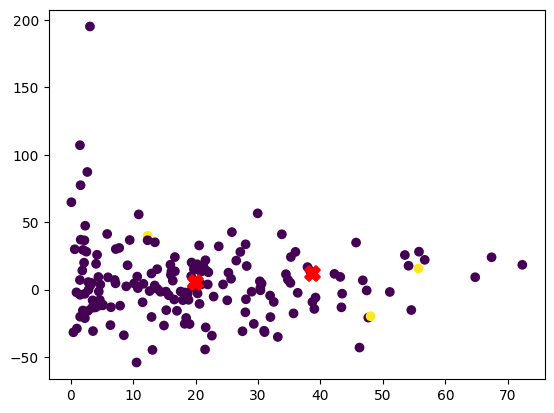

In [324]:

plt.scatter(X.iloc[:, 4], X.iloc[:, 3], c=X['cluster'], cmap='viridis')
plt.scatter(centroids[:, 4], centroids[:, 3], marker='X', s=100, linewidths=2, color='r')
plt.show()


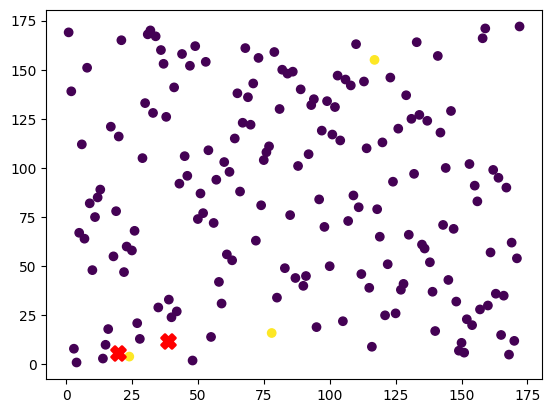

In [325]:
classement["cluster"] = kmeans.labels_
plt.scatter(classement.iloc[:, 4], classement.iloc[:, 3], c=classement['cluster'], cmap='viridis')
plt.scatter(centroids[:, 4], centroids[:, 3], marker='X', s=100, linewidths=2, color='r')
plt.show()

In [326]:
#sns.pairplot(X, hue='cluster', palette='viridis')

Analyse et interprétation des clusters

In [327]:
df_classements

,Pays,Classement_F1,Classement_F2,Classement_F3,Classement_F4,Classement_F5,Classement_F6,Classement_F7
0,États-Unis d'Amérique,1.0,2.0,83.0,156.0,24.0,68.0,0.717052
1,"Chine, continentale",2.0,1.0,163.0,110.0,14.0,171.0,-0.627897
2,Brésil,3.0,3.0,172.0,172.0,158.0,2.0,1.014572
3,Mexique,4.0,74.0,64.0,7.0,148.0,150.0,-1.716010
4,Pays-Bas,5.0,167.0,139.0,2.0,4.0,3.0,0.167730
...,...,...,...,...,...,...,...,...
167,Éthiopie,168.0,15.0,132.0,93.0,7.0,137.0,-0.642694
168,Afghanistan,169.0,4.0,67.0,5.0,118.0,167.0,0.685968
169,Soudan,170.0,13.0,155.0,117.0,6.0,117.0,-1.226487
170,Tchad,171.0,14.0,168.0,31.0,155.0,18.0,-0.822251


In [328]:
Xpc=df_classements
Xpca=df_classements[['Classement_F1','Classement_F2','Classement_F3','Classement_F4','Classement_F5','Classement_F6']]

In [329]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(Xpca)
inertia.append(kmeans.inertia_)
centroids = kmeans.cluster_centers_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [330]:
Xpc["cluster"] = kmeans.labels_

In [331]:
Xpc.set_index('Pays', inplace=True)
Xpc

,Classement_F1,Classement_F2,Classement_F3,Classement_F4,Classement_F5,Classement_F6,Classement_F7,cluster
Pays,,,,,,,,
États-Unis d'Amérique,1.0,2.0,83.0,156.0,24.0,68.0,0.717052,1
"Chine, continentale",2.0,1.0,163.0,110.0,14.0,171.0,-0.627897,2
Brésil,3.0,3.0,172.0,172.0,158.0,2.0,1.014572,1
Mexique,4.0,74.0,64.0,7.0,148.0,150.0,-1.716010,2
Pays-Bas,5.0,167.0,139.0,2.0,4.0,3.0,0.167730,2
...,...,...,...,...,...,...,...,...
Éthiopie,168.0,15.0,132.0,93.0,7.0,137.0,-0.642694,0
Afghanistan,169.0,4.0,67.0,5.0,118.0,167.0,0.685968,0
Soudan,170.0,13.0,155.0,117.0,6.0,117.0,-1.226487,0


In [332]:
#affichage des clusters trouvés
cluster0 = Xpc[Xpc['cluster'] == 0].index
cluster1 = Xpc[Xpc['cluster'] == 1].index
cluster2 = Xpc[Xpc['cluster'] == 2].index
print("Cluster '0' data:")
print(cluster0)

print("\nCluster '1' data:")
print(cluster1)

print("\nCluster '2' data:")
print(cluster2)

nb0 = (Xpc['cluster'] == 0).sum()
nb1 = (Xpc['cluster'] == 1).sum()
nb2 = (Xpc['cluster'] == 2).sum()

print("Nombre d'éléments dans le cluster '0':", nb0)
print("Nombre d'éléments dans le cluster '1':", nb1)
print("Nombre d'éléments dans le cluster '2':", nb2)

Cluster '0' data:
Index(['Philippines', 'Myanmar', 'Égypte', 'Iraq', 'Cuba', 'Mongolie',
       'Équateur', 'Nicaragua', 'Sri Lanka', 'Pakistan', 'Tunisie', 'Honduras',
       'Eswatini', 'Zambie', 'Lesotho', 'Turkménistan', 'Paraguay', 'Ghana',
       'Malawi', 'République démocratique populaire lao', 'Angola',
       'Ouzbékistan', 'Tadjikistan', 'Liban', 'Kirghizistan', 'Bénin',
       'Mozambique', 'Maldives', 'Sénégal', 'Zimbabwe', 'Ouganda',
       'République populaire démocratique de Corée',
       'Venezuela (République bolivarienne du)', 'Togo', 'Algérie', 'Gabon',
       'Congo', 'Kenya', 'Côte d'Ivoire', 'Mauritanie',
       'République-Unie de Tanzanie', 'Haïti', 'Népal', 'Cambodge',
       'Burkina Faso', 'Madagascar', 'Timor-Leste', 'Îles Salomon',
       'Sierra Leone', 'Niger', 'Sao Tomé-et-Principe', 'Nigéria', 'Libéria',
       'Gambie', 'Mali', 'Guinée', 'Guinée-Bissau', 'Djibouti', 'Cameroun',
       'Yémen', 'Bangladesh', 'Éthiopie', 'Afghanistan', 'Soudan', 'Tcha

# Dendrogramme ou classification ascendante hierarchique selon la methode de ward

Dendrograme sur le fichier de base table_fus

In [333]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [334]:
X = df
Z = linkage(X, method="ward")

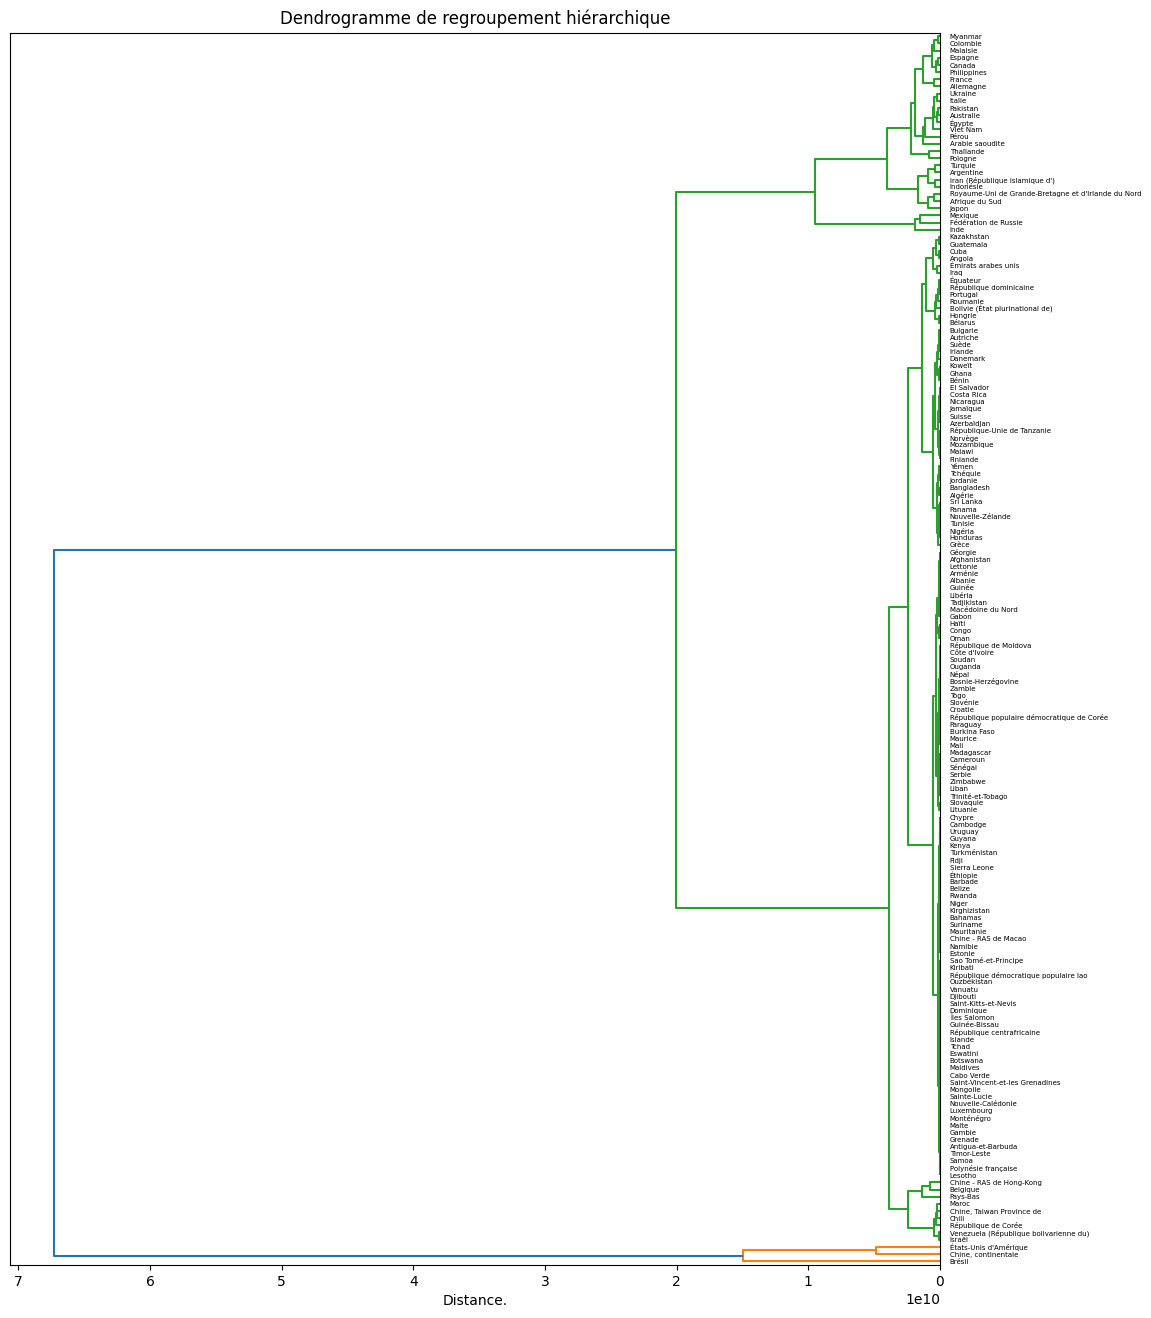

In [335]:
fig, ax = plt.subplots(1, 1, figsize=(12, 16))

_ = dendrogram(Z, labels=df.index, orientation='left') #truncate_mode="lastp"

plt.title("Dendrogramme de regroupement hiérarchique")
plt.xlabel("Distance.")
#plt.ylabel("Distance.")
plt.show()

on rend le dendrogram plus lisible en se limitant à 3 groupes (idem nombre de cluiuster de kmeans)

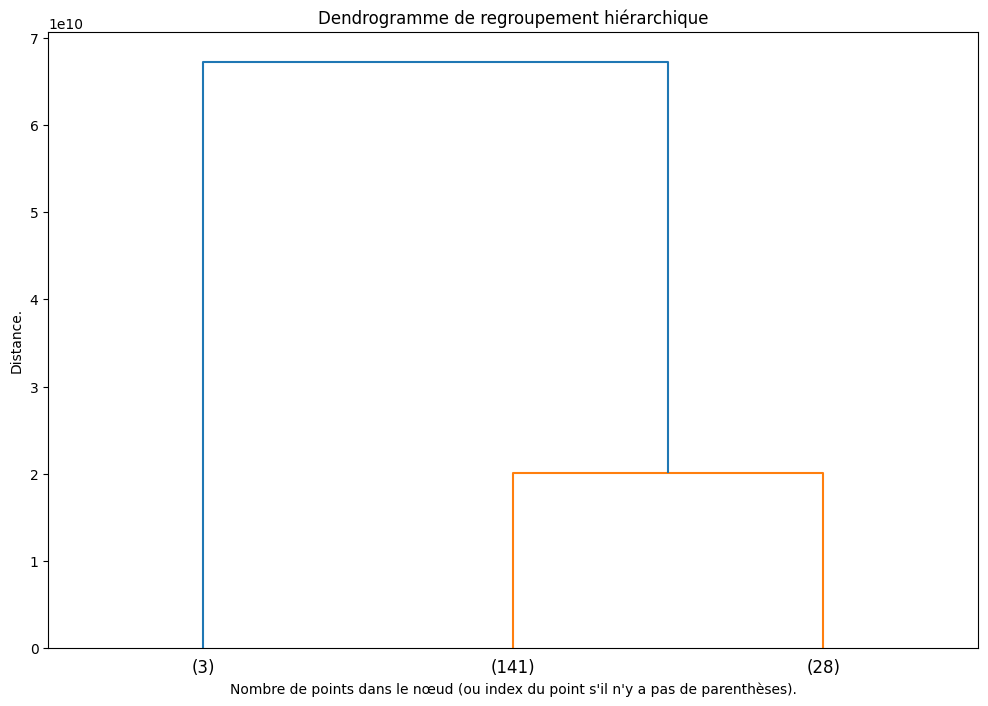

In [336]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

_ = dendrogram(Z, p=3, truncate_mode="lastp")

plt.title("Dendrogramme de regroupement hiérarchique")
plt.xlabel("Nombre de points dans le nœud (ou index du point s'il n'y a pas de parenthèses).")
plt.ylabel("Distance.")
plt.show()

Les résultats obtenues sont très cohérents avec ceux du Kmean

Dendrogramme sur la résultante du PCA

In [337]:
X = df_classements[['Classement_F1','Classement_F2','Classement_F3','Classement_F4','Classement_F5','Classement_F6']]
Z = linkage(X, method="ward")

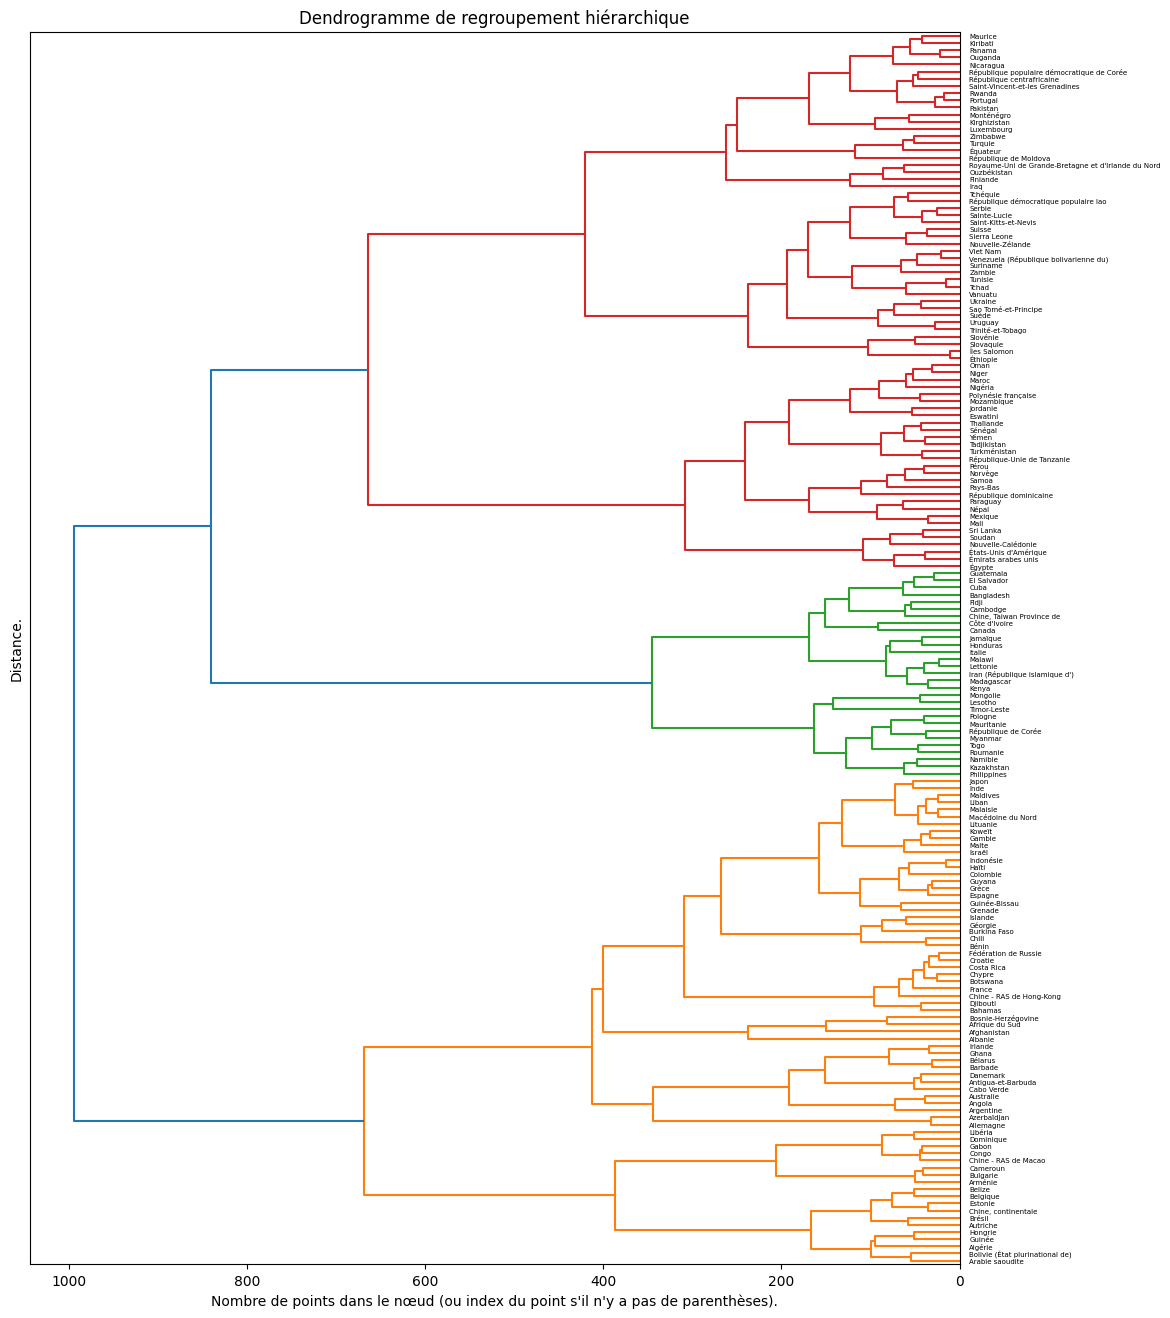

In [338]:
fig, ax = plt.subplots(1, 1, figsize=(12, 16))

_ = dendrogram(Z, labels=df.index, orientation='left') #truncate_mode="lastp"

plt.title("Dendrogramme de regroupement hiérarchique")
plt.xlabel("Nombre de points dans le nœud (ou index du point s'il n'y a pas de parenthèses).")
plt.ylabel("Distance.")
plt.show()

In [339]:
%pip install ydata_profiling
from ydata_profiling import ProfileReport
profile = ProfileReport(df, title="Profiling Report")

  Using cached pydantic-2.5.2-py3-none-any.whl (381 kB)
  Attempting uninstall: pydantic
    Found existing installation: pydantic 1.10.13
    Uninstalling pydantic-1.10.13:
      Successfully uninstalled pydantic-1.10.13
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
llmx 0.0.15a0 requires cohere, which is not installed.
llmx 0.0.15a0 requires openai, which is not installed.
llmx 0.0.15a0 requires tiktoken, which is not installed.
dataprep 0.4.5 requires pydantic<2.0,>=1.6, but you have pydantic 2.5.2 which is incompatible.
